In [1]:
import numpy as np 
import pandas as pd 

**Import Necessary Libraries**

In [2]:
# extra imports
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

**Dataset Info**

In [3]:
# import dataset https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?select=heart.csv
df=pd.read_csv('heart.csv') # import dataset file

In [4]:
"""""DataFrame Column Names
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target: presence of heart disease in the patient. 0 = no disease and 1 = with disease.
"""""
df.head() # show first 5 rows of data set

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.info() # prints info about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**Exploratory Data Analysis (EDA)**

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.shape 

(1025, 14)

In [8]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


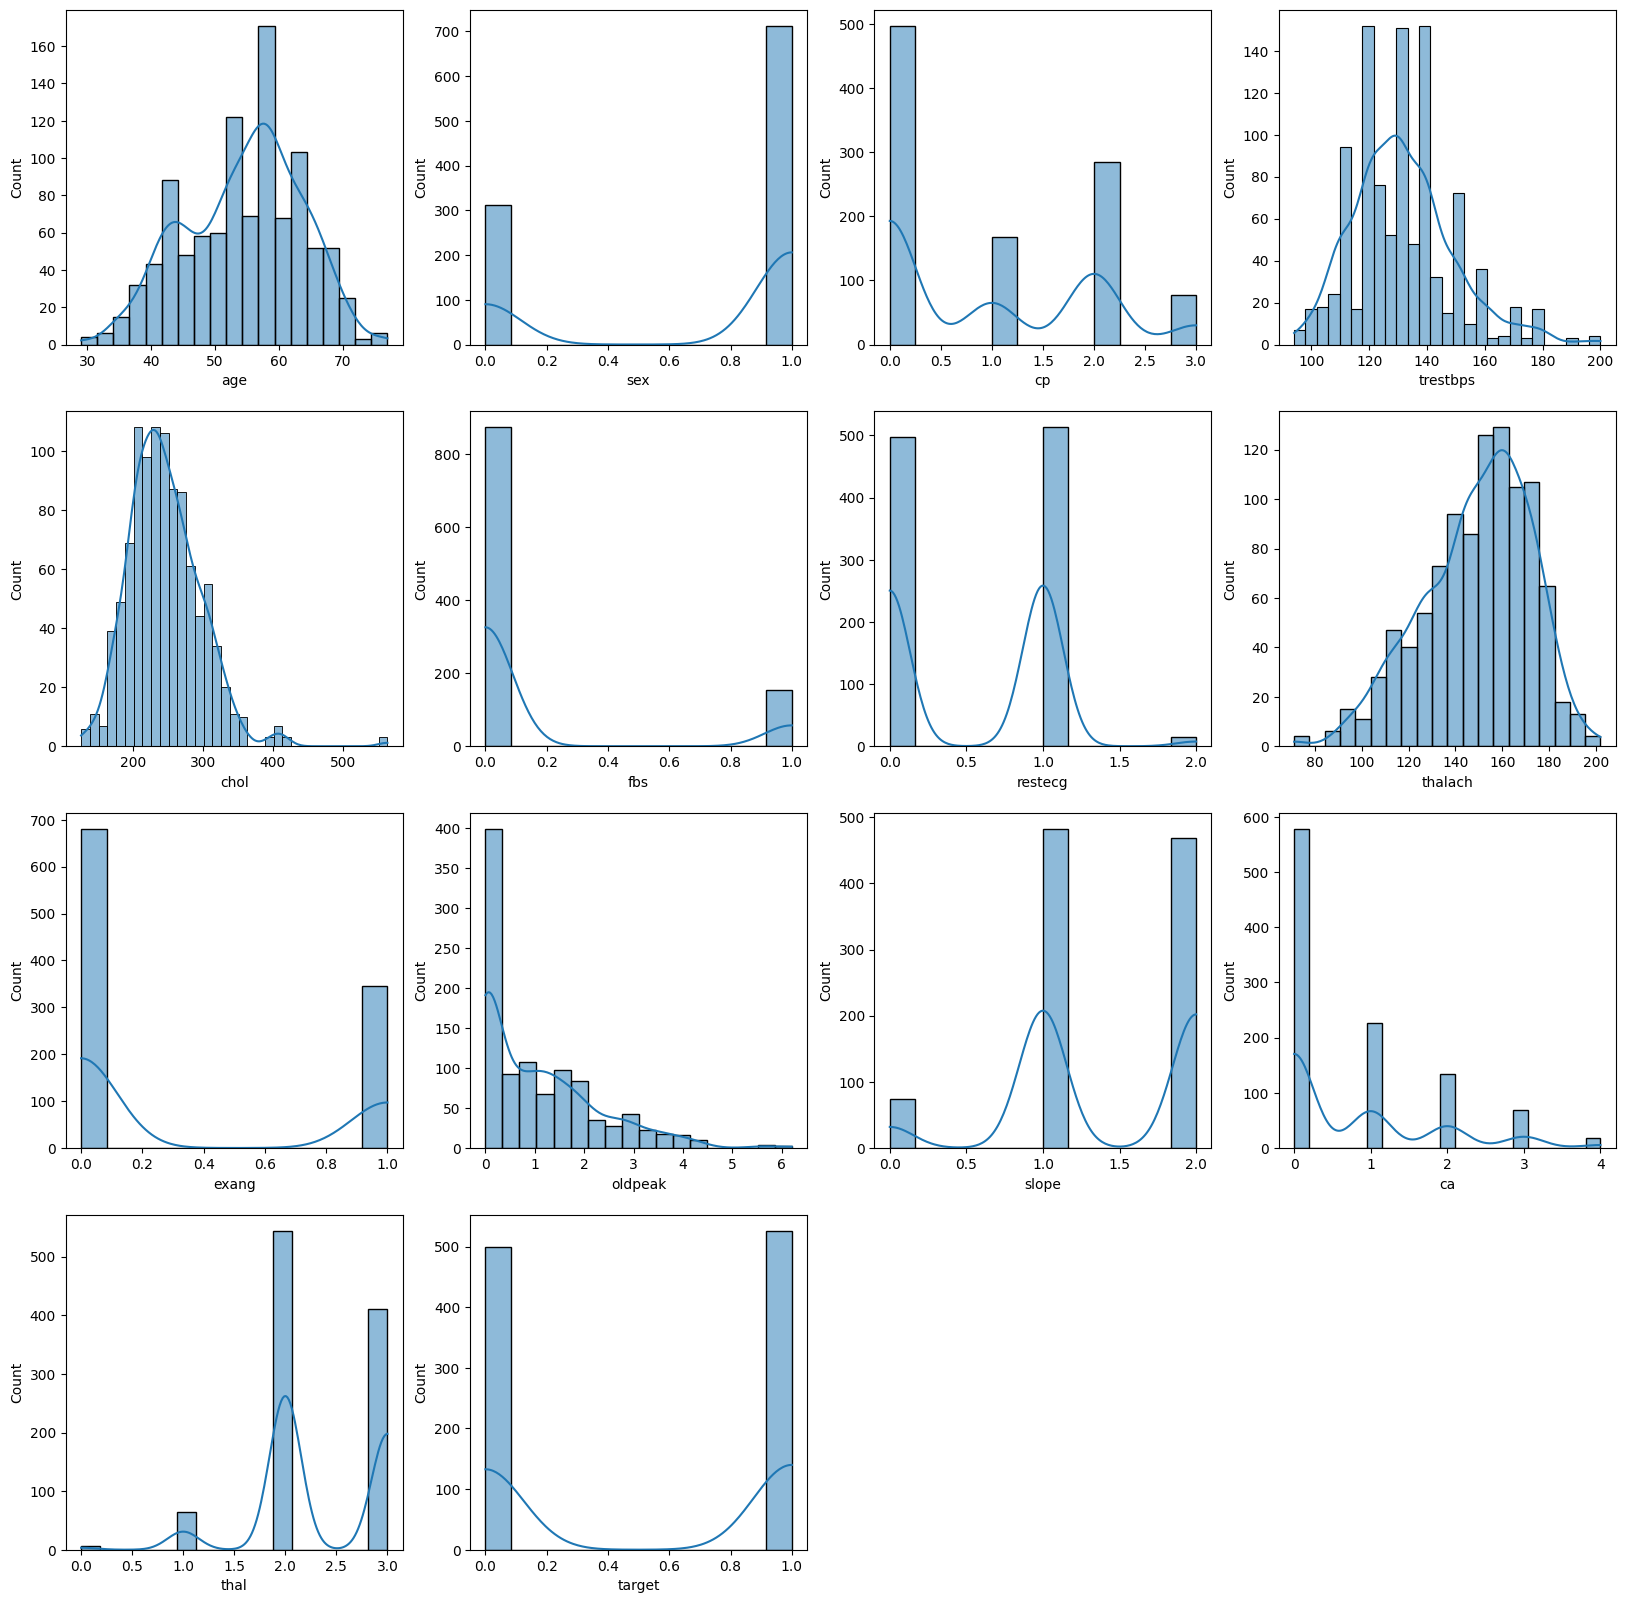

In [9]:
# plot distribution
plt.figure(figsize = (20, 20))
columns = list(df)
subplt = 1
for col in columns:
    if subplt <= len(columns):
        ax = plt.subplot(4, 4, subplt)
        sns.histplot(df[col], kde = True)
        plt.xlabel(col)
    subplt += 1
plt.show()

In [10]:
# identify categorical and numerical columns 
categ_cols = ['sex', 'cp', 'fbs', 'restecg','exang', 'slope', 'ca', 'thal', 'target']
numer_cols = ['age', 'tresbps', 'chol', 'thalach', 'oldpeak']

**Creating Model**

In [11]:
# create model
dep_col = 'target' 
ind_col = [col for col in df.columns if col != 'target'] 

x = df[ind_col] 
y = df[dep_col]

rand_seed = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = rand_seed)

**Selecting Classifiers**

In [12]:
from sklearn.linear_model import LogisticRegression

log_R = LogisticRegression() #Object Creation

log_R.fit(x_train, y_train)

y_predicted = log_R.predict(x_test)

print(accuracy_score(y_test,y_predicted))

0.7853658536585366


C:\Users\nuyap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
from sklearn.ensemble import RandomForestClassifier
#clas = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clas = RandomForestClassifier()
clas.fit(x_train, y_train)

y_predicted = clas.predict(x_test)

print(accuracy_score(y_test,y_predicted))

0.9853658536585366
